In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from arch import arch_model
from arch.__future__ import reindexing
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox


In [8]:
df = pd.read_csv('/Users/anushreegupta/Downloads/MSAM/Applied Statistics/HistoricalData_1677625629476.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df['Close'].astype(str)
df['Close'] = df['Close'].str.replace(',', '')
df['Close'] = df['Close'].astype(float)

In [9]:
df.head()

,Date,Close,Open,High,Low
0,2023-02-27,3982.24,3992.36,4018.05,3973.55
1,2023-02-24,3970.04,3973.24,3978.25,3943.08
2,2023-02-23,4012.32,4018.60,4028.30,3969.19
3,2023-02-22,3991.05,4001.83,4017.37,3976.90
4,2023-02-21,3997.34,4052.35,4052.35,3995.19


In [12]:
data = df

In [17]:
#drop rows that contain specific 'value' in 'column_name'
data = data[data.Open != 0]

In [37]:
fig = go.Figure(data=go.Scatter(x=data['Date'][:252],y=data['Close'][:252], mode='lines', name = 'Close'))
# Add Scatter plot
fig.add_scatter(x=data['Date'][:252], y=data['Open'][:252], name = 'Open')
fig.update_layout(title='Date vs Open/Close of F.Y. 2022-23',xaxis_title='Date', yaxis_title='Open/Close') 

fig.show()

In [38]:
fig = go.Figure(data=go.Scatter(x=data['Date'][:252],y=data['High'][:252], mode='lines', name = 'High'))
# Add Scatter plot
fig.add_scatter(x=data['Date'][:252], y=data['Close'][:252], name = 'Close')
fig.update_layout(title='Date vs High/Close of F.Y. 2022-23',xaxis_title='Date', yaxis_title='High/Close') 

fig.show()

In [39]:
fig = go.Figure(data=go.Scatter(x=data['Date'][:252],y=data['Low'][:252], mode='lines', name = 'Low'))
# Add Scatter plot
fig.add_scatter(x=data['Date'][:252], y=data['Open'][:252], name = 'Open')
fig.update_layout(title='Date vs Low/Open of F.Y. 2022-23',xaxis_title='Date', yaxis_title='Low/Open') 

fig.show()

In [30]:
df['Open'].describe()

count    2517.000000
mean     2780.884072
std       872.535985
min      1514.680000
25%      2063.450000
50%      2638.410000
75%      3360.500000
max      4804.510000
Name: Open, dtype: float64

In [31]:
df['Close'].describe()

count    2541.000000
mean     2773.168272
std       872.500021
min      1514.680000
25%      2061.020000
50%      2629.570000
75%      3349.160000
max      4796.560000
Name: Close, dtype: float64

In [32]:
daily_returns = df['Close'].pct_change()

In [33]:
n=5
realized_volatility = daily_returns.rolling(window=n).std() * np.sqrt(n)

In [8]:
df['actual_vol'] = daily_returns.rolling(5).std() * np.sqrt(5)

In [9]:
df.head(-5)

,Date,Close,Open,High,Low,actual_vol
0,2023-02-27,3982.24,3992.36,4018.05,3973.55,NaN
1,2023-02-24,3970.04,3973.24,3978.25,3943.08,NaN
2,2023-02-23,4012.32,4018.60,4028.30,3969.19,NaN
3,2023-02-22,3991.05,4001.83,4017.37,3976.90,NaN
4,2023-02-21,3997.34,4052.35,4052.35,3995.19,NaN
...,...,...,...,...,...,...
2531,2013-03-13,1554.52,1552.48,1556.39,1548.25,0.011892
2532,2013-03-12,1552.48,1556.22,1556.77,1548.24,0.009389
2533,2013-03-11,1556.22,1551.15,1556.27,1547.36,0.009385
2534,2013-03-08,1551.18,1544.26,1552.48,1542.94,0.007438


In [10]:
realized_volatility.describe()

count    2536.000000
mean        0.019198
std         0.016674
min         0.001183
25%         0.009391
50%         0.014815
75%         0.023898
max         0.218600
Name: Close, dtype: float64

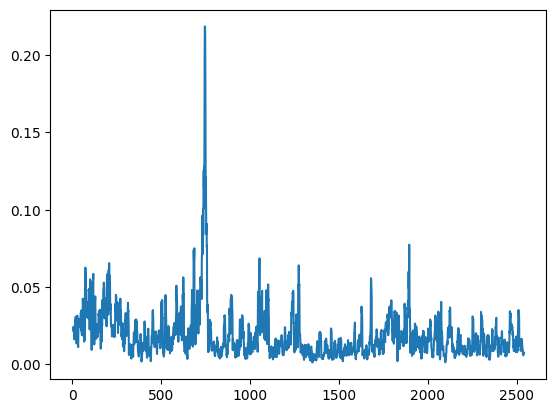

In [13]:
plt.plot(realized_volatility)

In [14]:


returns = dr_train.dropna()

In [15]:
returns.describe()

count    199.000000
mean       0.000047
std        0.014634
min       -0.052523
25%       -0.010055
50%        0.001239
75%        0.008668
max        0.045190
Name: Close, dtype: float64

In [16]:
model = arch_model(returns, p=1,q=1, vol='GARCH')
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 67813.31000822675
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3697179138961822.0
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1967161641576576.5
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4301.98016796493
Iteration:      5,   Func. Count:     51,   Neg. LLF: 139972562175059.14
Iteration:      6,   Func. Count:     64,   Neg. LLF: 2554870244785.483
Iteration:      7,   Func. Count:     75,   Neg. LLF: 405759426424.0216
Optimization terminated successfully    (Exit mode 0)
            Current function value: -562.0749242315833
            Iterations: 10
            Function evaluations: 85
            Gradient evaluations: 7


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:309: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002131. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [47]:
returns = daily_returns.dropna()
model = arch_model(returns, p=2, q=1, vol = 'GARCH', rescale=False)
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=5)
print(pred.variance.values)
print(pred.variance.values[-1,:])
print(pred.variance.values[0])
print(pred.variance.values[0][0])
#rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

[[2.96559168e-05 2.88400228e-05 3.08369019e-05 3.25125661e-05
  3.41868384e-05]]
[2.96559168e-05 2.88400228e-05 3.08369019e-05 3.25125661e-05
 3.41868384e-05]
[2.96559168e-05 2.88400228e-05 3.08369019e-05 3.25125661e-05
 3.41868384e-05]
2.9655916753064215e-05
2.9655916753064215e-05


In [48]:
rolling_predictions = []
daily_returns = daily_returns.dropna()
test_size = len(daily_returns)-1#len(dr_test)-1

for i in range(test_size):
    np.seterr(divide='ignore', invalid='ignore')
    returns = daily_returns[:-(test_size-i)]
    model = arch_model(returns, p=2, q=1, vol = 'GARCH', rescale=False)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=5)
    rolling_predictions.append(np.sqrt(pred.variance.values[0][0]))

/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




In [49]:
len(rolling_predictions)

2539

In [52]:
len(realized_volatility)

2541

In [51]:
print(rolling_predictions)

[0.0, 0.006856679239351984, 0.014955783850678445, 0.006132622351510989, 0.004018777544176356, 0.01687134009364113, 0.00014066031634864037, 0.008345195372299595, 0.006969893152680006, 0.009639628276235546, 0.014215235295588522, 0.008318522027645407, 0.008142408838620703, 0.010030056383533045, 0.009413844867802022, 0.009111476780866672, 0.010538536911430647, 0.01068440497530045, 0.010755577928251674, 0.010297106349936193, 0.010967947312654241, 0.010966356150114744, 0.010016588103807615, 0.00911723649703611, 0.009323656556101203, 0.010900865798302234, 0.010728376387894076, 0.011410738622039425, 0.011183543930629673, 0.010515023768083982, 0.009665480238671106, 0.009771367254250657, 0.01009952807363163, 0.009622782877051397, 0.010393576068485427, 0.011606300805803424, 0.010417804223198867, 0.010397552559277434, 0.010153651890895924, 0.010629042922205472, 0.01089784258285268, 0.010780431891147938, 0.0102287481991935, 0.010409340507400649, 0.010986398144181269, 0.010381542149943657, 0.0105036

In [135]:
rolling_predictions = []
aic = []
bic = []

lags = 10
lb_test = []

daily_returns = daily_returns.dropna()
print(daily_returns)
test_size = len(daily_returns)-1#len(dr_test)-1

for p in range(1,10,1):
    for q in range(1,10,1):
        for i in range(test_size):
            np.seterr(divide='ignore', invalid='ignore')
            returns = daily_returns[:-(test_size-i)]
            model = arch_model(returns, p=p, q=q, vol = 'GARCH', rescale=False)
            model_fit = model.fit(disp='off')
        aic.append(model_fit.aic)
        bic.append(model_fit.bic)
            #pred = model_fit.forecast(horizon=5)
            #rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

1      -0.003064
2       0.010650
3      -0.005301
4       0.001576
5       0.020451
          ...   
2536   -0.001813
2537   -0.001083
2538   -0.009475
2539   -0.004590
2540   -0.002319
Name: Close, Length: 2540, dtype: float64


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for co

In [136]:
aic

[-17049.808909268424,
 -17006.604048654972,
 -16960.590735749363,
 -16915.56445393667,
 -16882.443821775934,
 -16843.157397795647,
 -16810.919280011927,
 -16784.82698220201,
 -16757.892918833437,
 -17059.965686719865,
 -17027.073008546886,
 -16985.59158445888,
 -16949.53882950282,
 -16915.260067648334,
 -16881.636357640316,
 -16853.937701279072,
 -16828.594131140875,
 -16805.646044724082,
 -17039.888223074726,
 -17005.943840430587,
 -16971.02878460011,
 -16934.99488269526,
 -16902.38801160123,
 -16871.24566487595,
 -16843.80097328536,
 -16819.809568741657,
 -16796.976703699755,
 -17012.88304061623,
 -16983.460545952956,
 -16947.94152646983,
 -16914.19662391244,
 -16883.78132209062,
 -16853.937416738107,
 -16828.12528025091,
 -16804.51610387088,
 -16783.124579640615,
 -16985.110559465684,
 -16953.560736840587,
 -16918.958809287928,
 -16886.696207138222,
 -16857.12632809518,
 -16830.835151582083,
 -16804.496490247613,
 -16782.2667418411,
 -16761.507264695523,
 -16965.001088672103,
 -1693

In [139]:
aic.index(min(aic))

9

In [140]:
for i in range(test_size):
    np.seterr(divide='ignore', invalid='ignore')
    returns = daily_returns[:-(test_size-i)]
    model = arch_model(returns, p=2, q=1, vol = 'GARCH', rescale=False)
    model_fit = model.fit(disp='off')
    
aic = model_fit.aic
bic = model_fit.bic

/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




In [141]:
aic

-17059.965686719865

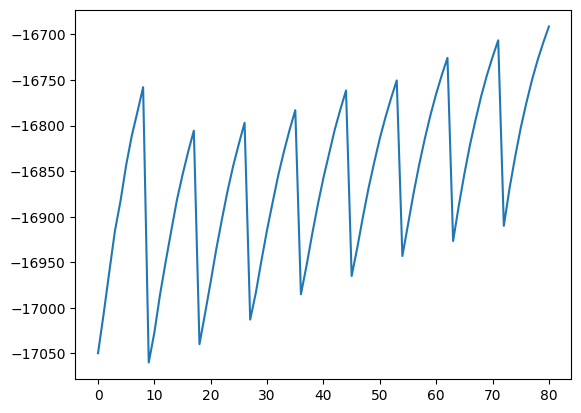

In [137]:
x = np.linspace(1,5,1)
plt.plot(aic)

Text(0.5, 1.0, 'Rolling Prediction')

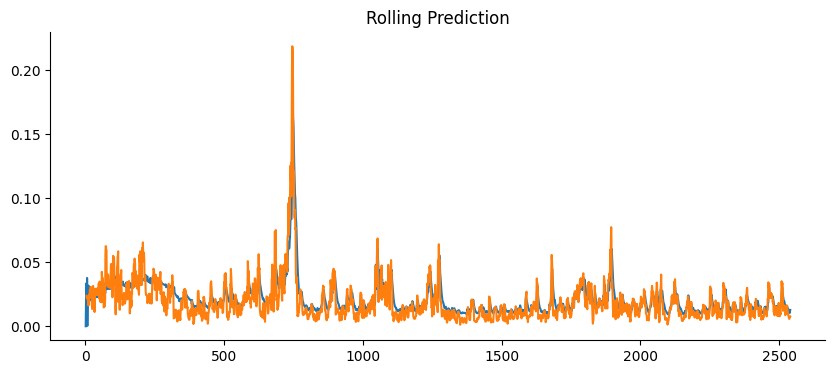

In [19]:
rolling_predictions = pd.Series(rolling_predictions, index=df['Close'].index[-2539:]) 

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot((rolling_predictions * 5**0.5))
plt.plot(realized_volatility)
plt.title('Rolling Prediction')

/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/matplotlib/axes/_base.py:2532: UserWarning:




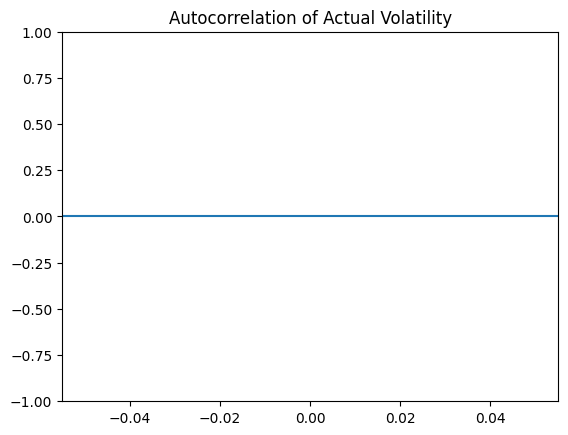

/Users/anushreegupta/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/stattools.py:467: RuntimeWarning:

Mean of empty slice.



ValueError: negative dimensions are not allowed

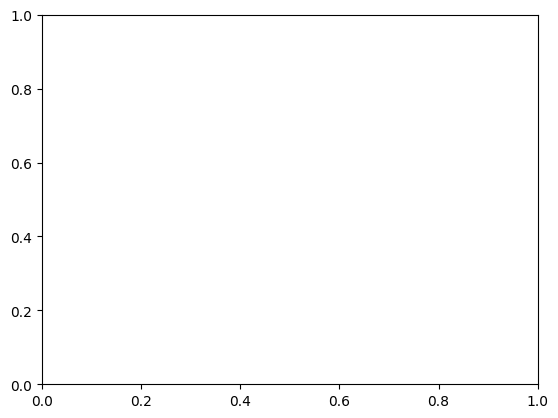

In [143]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot the autocorrelation function for actual volatility
sm.graphics.tsa.plot_acf(realized_volatility, lags=30)
plt.title("Autocorrelation of Actual Volatility")
plt.show()

# Plot the autocorrelation function for GARCH volatility
sm.graphics.tsa.plot_acf(rolling_predictions, lags=30)
plt.title("Autocorrelation of GARCH Volatility")
plt.show()

# Plot the cross-correlation function between actual and GARCH volatility
sm.graphics.tsa.plot_acf(realized_volatility, x=rolling_predictions, lags=30)
plt.title("Cross-Correlation between Actual and GARCH Volatility")
plt.show()

In [20]:
from scipy.stats import jarque_bera

jb_test = jarque_bera(model_fit.resid)

jb_stats = jb_test[0]
jb_pval = jb_test[1]

print(jb_stats)
print(jb_pval)

36250.37437102552
0.0


In [147]:
jb_test

Jarque_beraResult(statistic=36250.37437102552, pvalue=0.0)

AttributeError: 'numpy.float64' object has no attribute 'dropna'

In [156]:
realized_volatility

<bound method Series.dropna of 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2536    0.005813
2537    0.005836
2538    0.007421
2539    0.007367
2540    0.007611
Name: Close, Length: 2541, dtype: float64>

In [155]:
len(realized_volatility)

TypeError: object of type 'method' has no len()

In [154]:
rolling_predictions

[0.0,
 0.006856679239351984,
 0.014955783850678445,
 0.006132622351510989,
 0.004018777544176356,
 0.01687134009364113,
 0.00014066031634864037,
 0.008345195372299595,
 0.006969893152680006,
 0.009639628276235546,
 0.014215235295588522,
 0.008318522027645407,
 0.008142408838620703,
 0.010030056383533045,
 0.009413844867802022,
 0.009111476780866672,
 0.010538536911430647,
 0.01068440497530045,
 0.010755577928251674,
 0.010297106349936193,
 0.010967947312654241,
 0.010966356150114744,
 0.010016588103807615,
 0.00911723649703611,
 0.009323656556101203,
 0.010900865798302234,
 0.010728376387894076,
 0.011410738622039425,
 0.011183543930629673,
 0.010515023768083982,
 0.009665480238671106,
 0.009771367254250657,
 0.01009952807363163,
 0.009622782877051397,
 0.010393576068485427,
 0.011606300805803424,
 0.010417804223198867,
 0.010397552559277434,
 0.010153651890895924,
 0.010629042922205472,
 0.01089784258285268,
 0.010780431891147938,
 0.0102287481991935,
 0.010409340507400649,
 0.0109863

In [24]:
import pandas as pd
import numpy as np

# Load the data into a pandas dataframe
#file_path = "your_file_path.csv"
#stock_prices = pd.read_csv(file_path)

# Set the 'Date' column as the index
#stock_prices = stock_prices.set_index('Date')

# Calculate the autocorrelation between 'Close' and 'Open' columns using cross-correlation
act_val = real_vol
garch = rolling_vol
correlation = np.correlate(act_val - act_val.mean(), garch - garch.mean(), mode='full') / (len(act_val) * act_val.std() * garch.std())

print("Cross-correlation between 'Close' and 'Open':", correlation)

Cross-correlation between 'Close' and 'Open': [-7.37365433e-05 -1.28744925e-04 -2.07855714e-04 ...  9.94198157e-05
  4.33896398e-04  1.65527034e-04]


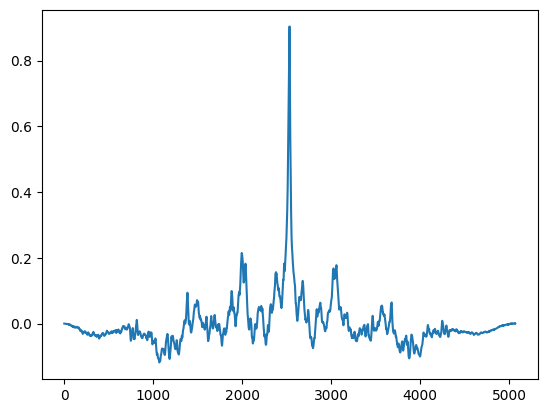

In [25]:
plt.plot(correlation)

In [21]:
correlation = rolling_vol.corr(real_vol)
correlation

NameError: name 'rolling_vol' is not defined

In [195]:
len(correlation)

5071

In [183]:
len(realized_volatility)

2541

In [53]:
real_vol = realized_volatility.dropna()

In [54]:
real_vol

5       0.023807
6       0.022027
7       0.023125
8       0.021567
9       0.022023
          ...   
2536    0.005813
2537    0.005836
2538    0.007421
2539    0.007367
2540    0.007611
Name: Close, Length: 2536, dtype: float64

In [55]:
rolling_vol = rolling_predictions[3:]

In [57]:
len(rolling_vol)

2536

In [182]:
len(correlation)

SyntaxError: unexpected EOF while parsing (2599439394.py, line 1)

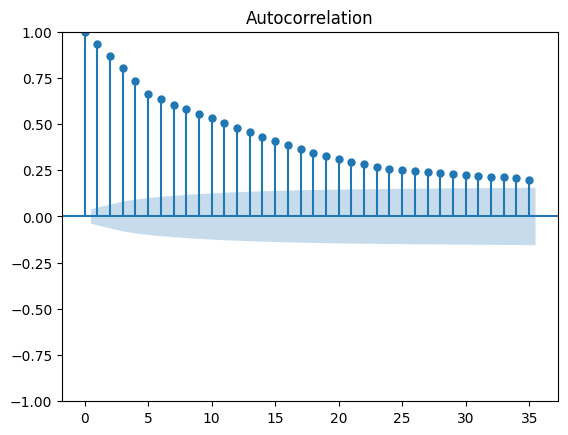

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(real_vol)
plt.show()

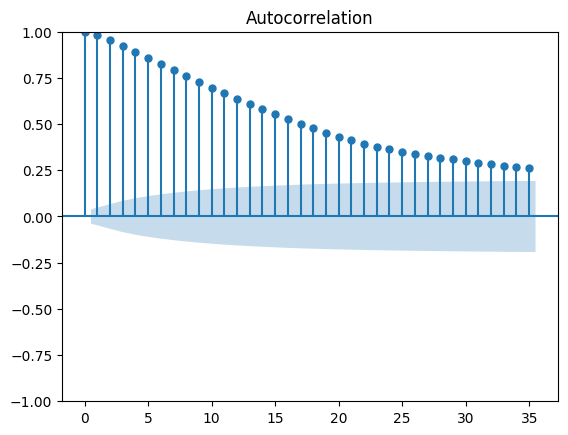

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rolling_vol)
plt.show()

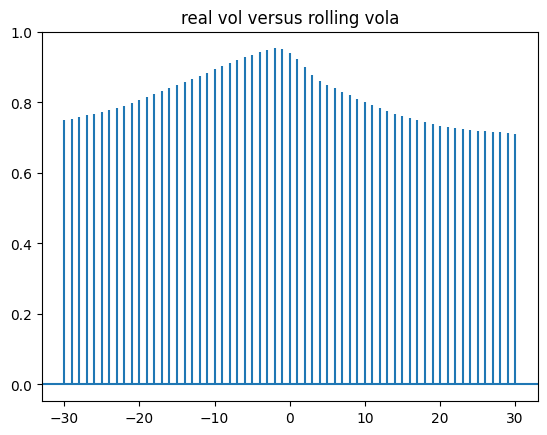

In [28]:
plt.xcorr(real_vol, rolling_vol, normed=True, usevlines=True, maxlags=30)
plt.title("real vol versus rolling vola")
plt.show()

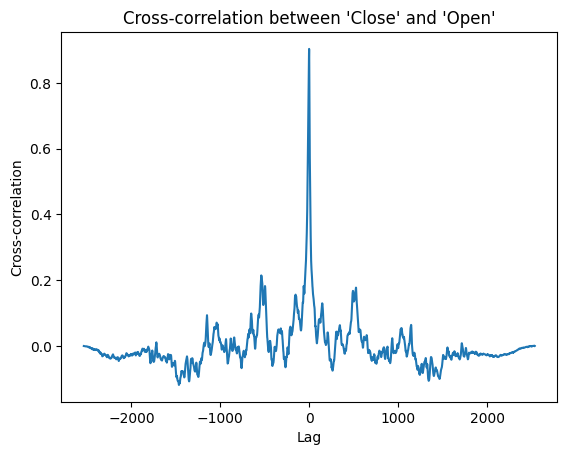

In [208]:
lags = np.arange(-len(real_vol) + 1, len(real_vol))
plt.plot(lags, correlation)
plt.title("Cross-correlation between 'Close' and 'Open'")
plt.xlabel("Lag")
plt.ylabel("Cross-correlation")
plt.show()

In [30]:
import statsmodels.api as sm
lb_test = sm. stats.diagnostic.acorr_ljungbox(model_fit. resid, lags= [10])
print (lb_test)

       lb_stat     lb_pvalue
10  274.200581  4.353169e-53


In [64]:
import statsmodels.api as sm
lb_test = sm. stats.diagnostic.acorr_ljungbox(daily_returns.dropna(), lags= [10])
print (lb_test)

       lb_stat     lb_pvalue
10  274.312172  4.123589e-53


In [37]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(model_fit.resid, lags=10)

lb_test

,lb_stat,lb_pvalue
1,49.737030,1.757965e-12
2,70.158147,5.825752e-16
3,70.530151,3.286483e-15
4,76.912924,7.846733e-16
5,83.564309,1.505175e-16
6,114.978866,1.844626e-22
7,171.633228,1.135945e-33
8,215.459227,3.504503e-42
9,264.636816,8.061658e-52
10,274.200581,4.353169e-53


In [63]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(daily_returns.dropna(), lags=10)

lb_test

,lb_stat,lb_pvalue
1,49.736124,1.758777e-12
2,70.191153,5.730399e-16
3,70.562995,3.233686e-15
4,76.945698,7.722403e-16
5,83.606342,1.474958e-16
6,115.022002,1.806598e-22
7,171.684024,1.108268e-33
8,215.521938,3.399261e-42
9,264.741066,7.662683e-52
10,274.312172,4.123589e-53


In [36]:
lb_test

,lb_stat,lb_pvalue
1,49.737030,1.757965e-12
2,70.158147,5.825752e-16
3,70.530151,3.286483e-15
4,76.912924,7.846733e-16
5,83.564309,1.505175e-16
6,114.978866,1.844626e-22
7,171.633228,1.135945e-33
8,215.459227,3.504503e-42
9,264.636816,8.061658e-52
10,274.200581,4.353169e-53


In [42]:
het_test = sm.stats.het_arch(model_fit.resid)
het_test

(965.1415547176754,
 6.0230211775011075e-201,
 155.3993868249614,
 3.42092223877066e-254)